# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine

Defaulting to user installation because normal site-packages is not writeable


Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_clusterKM(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    color
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    color
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            #plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



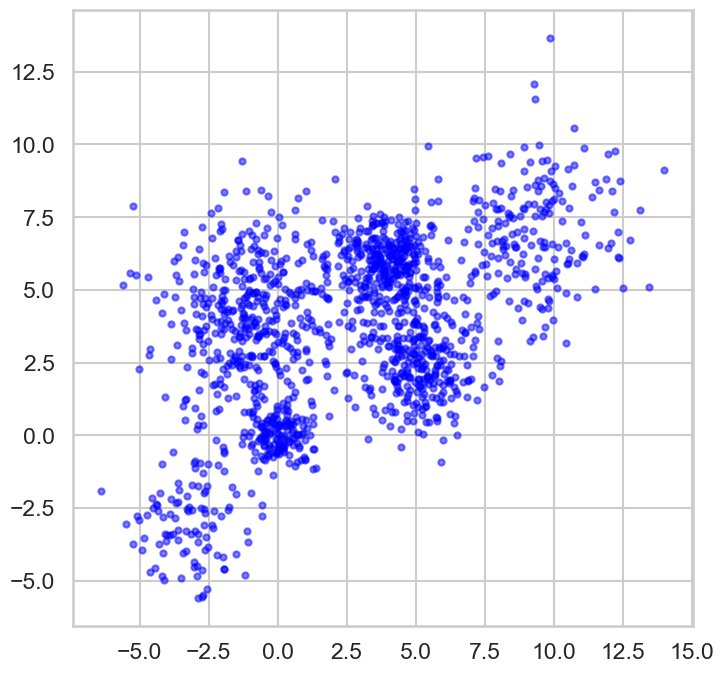

In [5]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_clusterKM(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

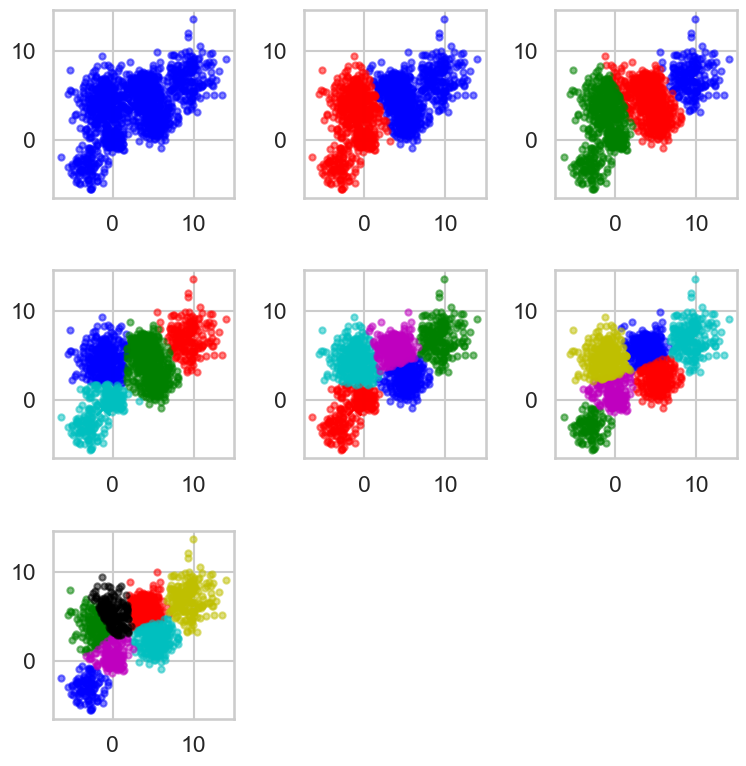

In [6]:
for x in range(1,8):
    kmeans = KMeans(n_clusters=x)
    kmeans.fit(Multi_blob_Data)
    plt.subplot(3,3,x)
    plt.tight_layout()
    display_clusterKM(Multi_blob_Data,kmeans,x)
    x=x+1
    



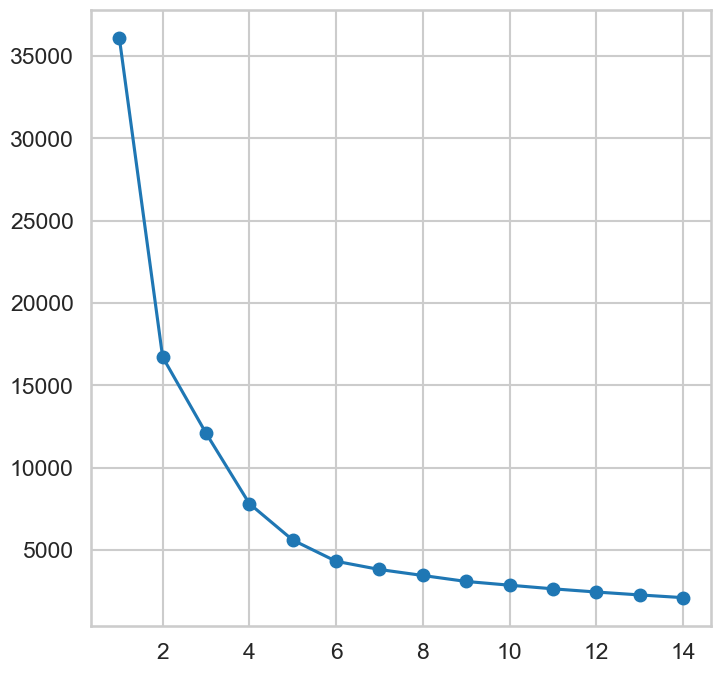

In [7]:
inertias = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Multi_blob_Data)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,15), inertias, marker='o')
#K=6

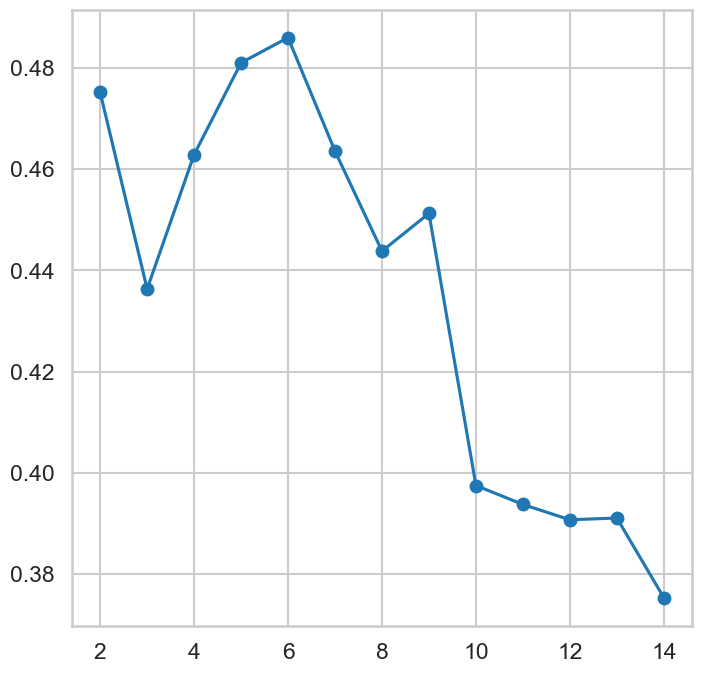

In [8]:
score = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Multi_blob_Data)
    score.append(silhouette_score(Multi_blob_Data, kmeans.labels_, metric='euclidean'))
plt.plot(range(2,15), score, marker='o')
#K=6

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

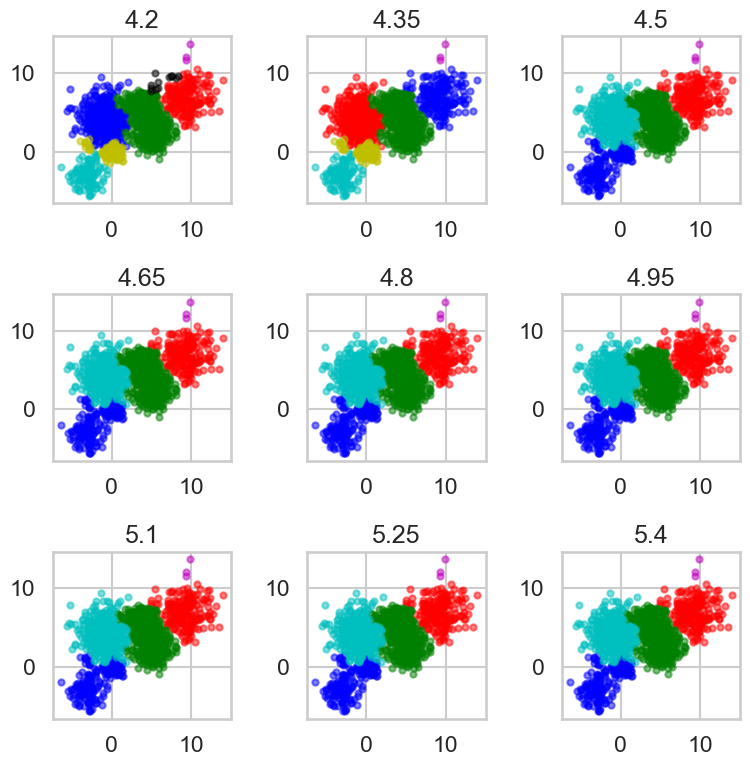

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
x=4.2
for m in range(9):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='euclidean', linkage='average')
    #4.2-
    labels = hierarchical_cluster.fit_predict(Multi_blob_Data)
    plt.subplot(3,3,m+1)
    plt.tight_layout()
    plt.title(label=round(x, 2))
    display_cluster(Multi_blob_Data,hierarchical_cluster,hierarchical_cluster.n_clusters_)
    #print(x)
    x=x+0.15
    m

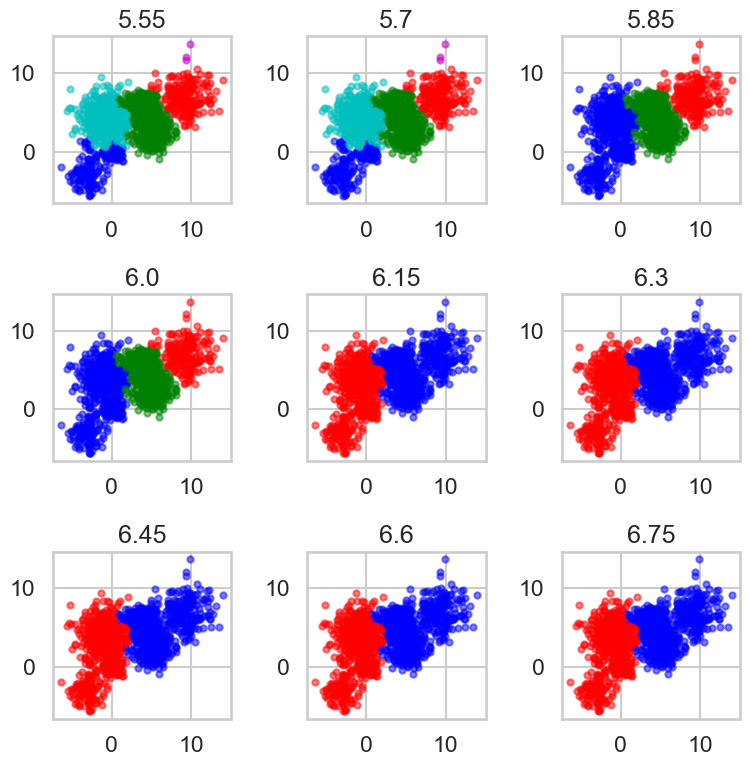

In [10]:
x=5.4+0.15
for m in range(9):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='euclidean', linkage='average')
    #4.2-
    labels = hierarchical_cluster.fit_predict(Multi_blob_Data)
    plt.subplot(3,3,m+1)
    plt.tight_layout()
    plt.title(label=round(x, 2))
    display_cluster(Multi_blob_Data,hierarchical_cluster,hierarchical_cluster.n_clusters_)
    #print(x)
    x=x+0.15
    m

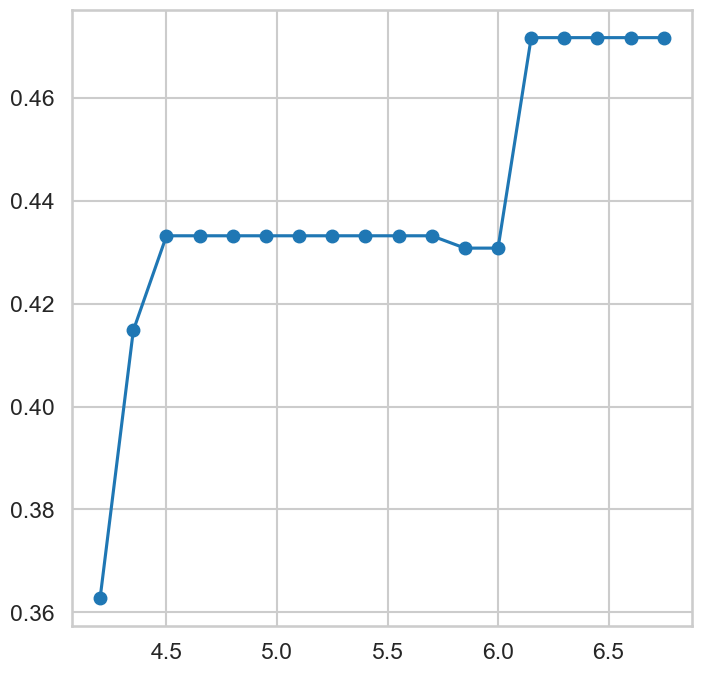

In [11]:
silhouette_scores = []
s = []
x=4.2
for i in range(18):
    s.append(x)
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='euclidean', linkage='average')
    silhouette_scores.append(silhouette_score(Multi_blob_Data, hierarchical_cluster.fit_predict(Multi_blob_Data)))
    x=x+0.15
plt.plot(s, silhouette_scores, marker='o')

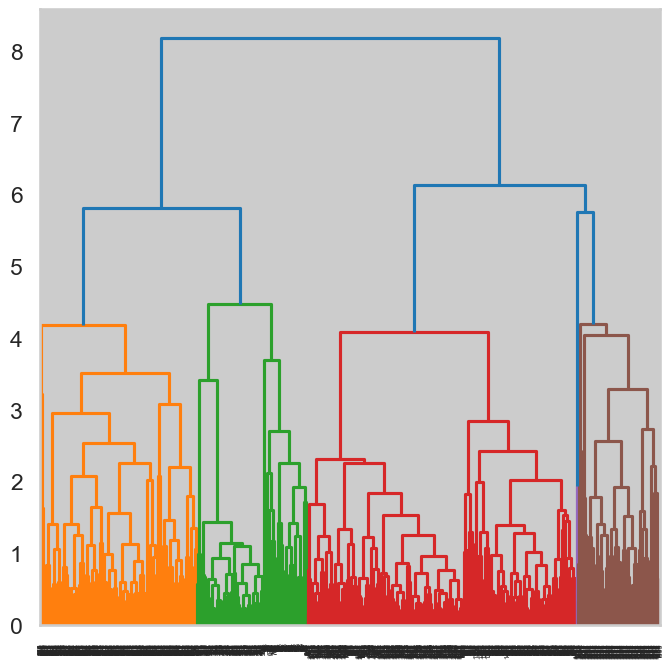

In [12]:
#hierarchical_cluster
#Multi_blob_Data
linkage_data = linkage(Multi_blob_Data, method='average', metric='euclidean')
dendrogram(linkage_data)
plt.show()

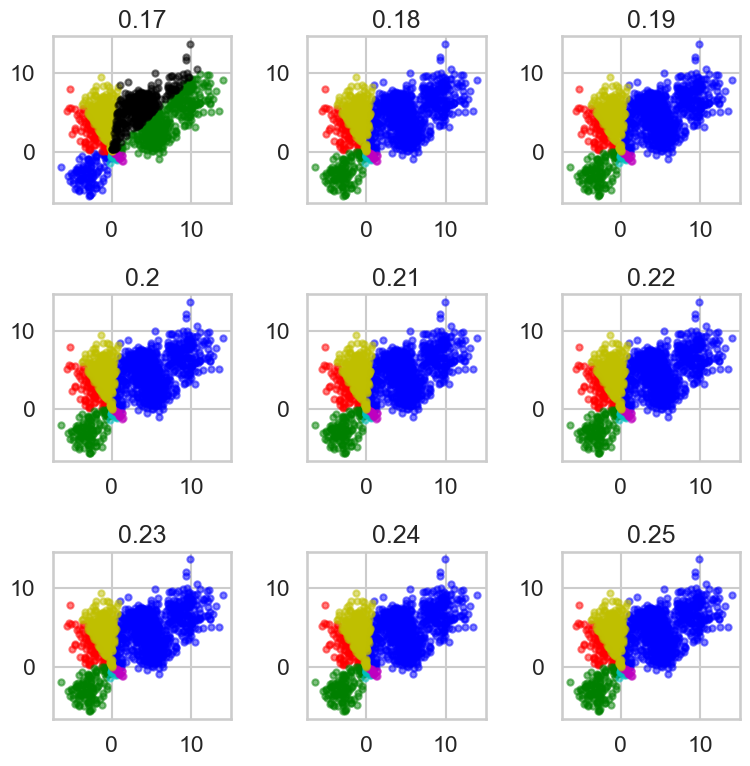

In [13]:
x=0.17
for m in range(9):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='cosine', linkage='average')
    #4.2-
    labels = hierarchical_cluster.fit_predict(Multi_blob_Data)
    plt.subplot(3,3,m+1)
    plt.tight_layout()
    plt.title(label=round(x, 2))
    display_cluster(Multi_blob_Data,hierarchical_cluster,hierarchical_cluster.n_clusters_)
    #print(x)
    x=x+0.01

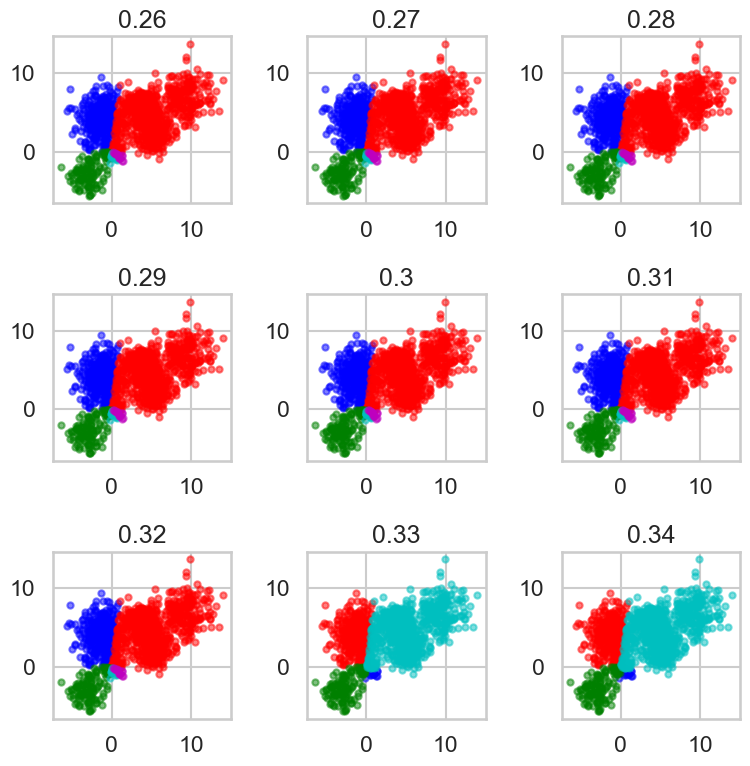

In [14]:
x=0.26
for m in range(9):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='cosine', linkage='average')
    #4.2-
    labels = hierarchical_cluster.fit_predict(Multi_blob_Data)
    plt.subplot(3,3,m+1)
    plt.tight_layout()
    plt.title(label=round(x, 2))
    display_cluster(Multi_blob_Data,hierarchical_cluster,hierarchical_cluster.n_clusters_)
    #print(x)
    x=x+0.01

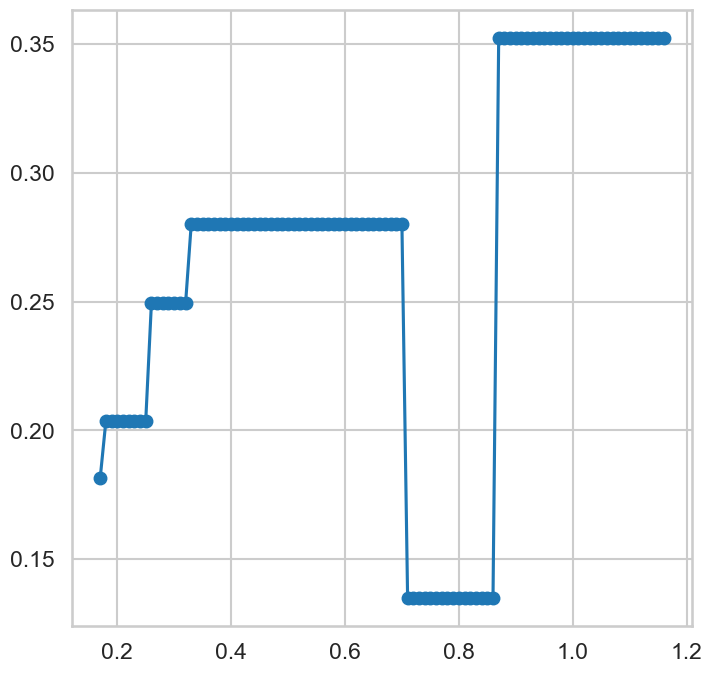

In [15]:
silhouette_scores = []
s = []
x=0.17
for i in range(100):
    s.append(x)
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='cosine', linkage='average')
    silhouette_scores.append(silhouette_score(Multi_blob_Data, hierarchical_cluster.fit_predict(Multi_blob_Data)))
    x=x+0.01
plt.plot(s, silhouette_scores, marker='o')

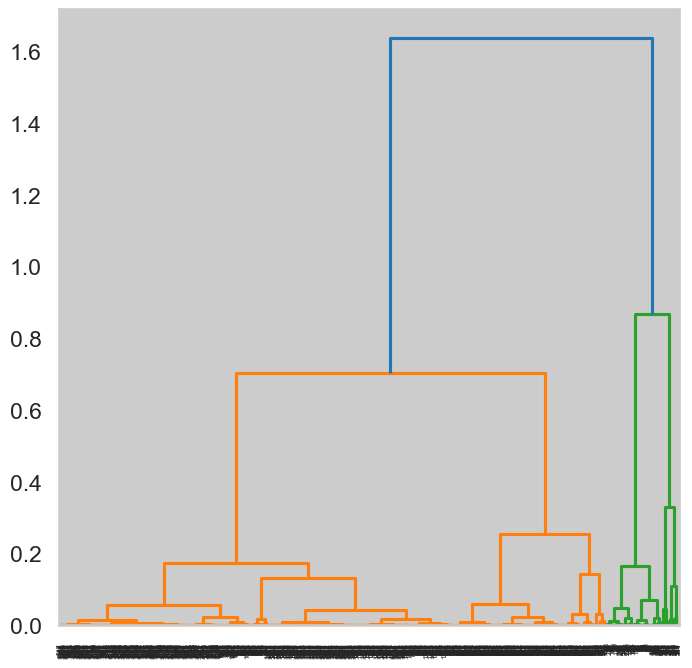

In [16]:
linkage_data = linkage(Multi_blob_Data, method='average', metric='cosine')
dendrogram(linkage_data)
plt.show()

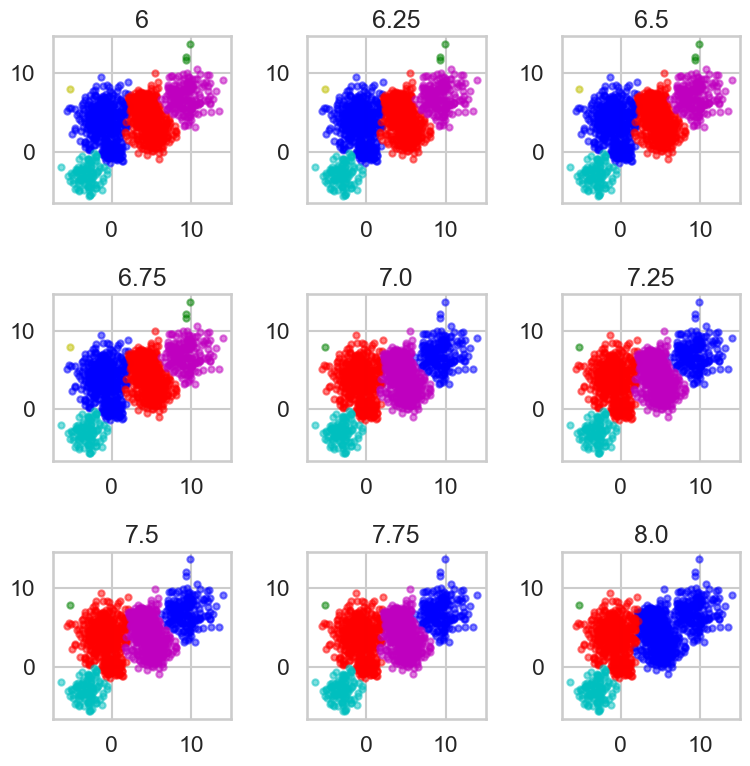

In [17]:
x=6
for m in range(9):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='manhattan', linkage='average')
    labels = hierarchical_cluster.fit_predict(Multi_blob_Data)
    plt.subplot(3,3,m+1)
    plt.tight_layout()
    plt.title(label=round(x, 2))
    display_cluster(Multi_blob_Data,hierarchical_cluster,hierarchical_cluster.n_clusters_)
    x=x+0.25

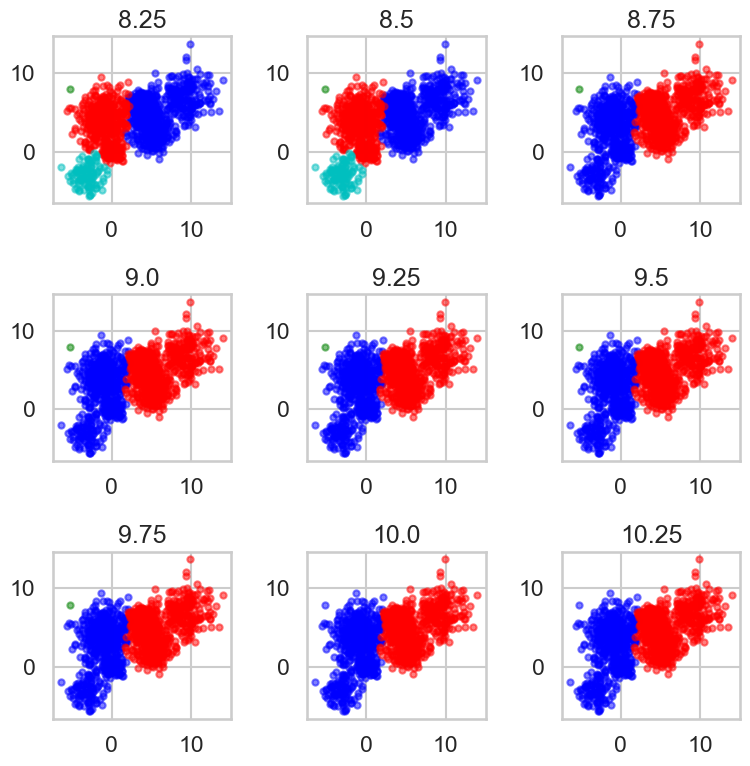

In [18]:
x=8.25
for m in range(9):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='manhattan', linkage='average')
    labels = hierarchical_cluster.fit_predict(Multi_blob_Data)
    plt.subplot(3,3,m+1)
    plt.tight_layout()
    plt.title(label=round(x, 2))
    display_cluster(Multi_blob_Data,hierarchical_cluster,hierarchical_cluster.n_clusters_)
    x=x+0.25

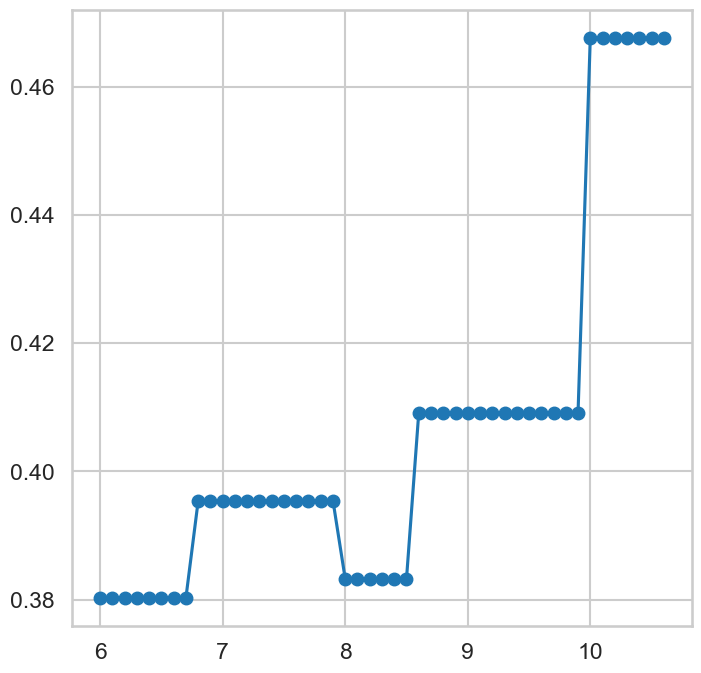

In [19]:
silhouette_scores = []
s = []
x=6
for i in range(47):
    s.append(x)
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='manhattan', linkage='average')
    silhouette_scores.append(silhouette_score(Multi_blob_Data, hierarchical_cluster.fit_predict(Multi_blob_Data)))
    x=x+0.1
plt.plot(s, silhouette_scores, marker='o')

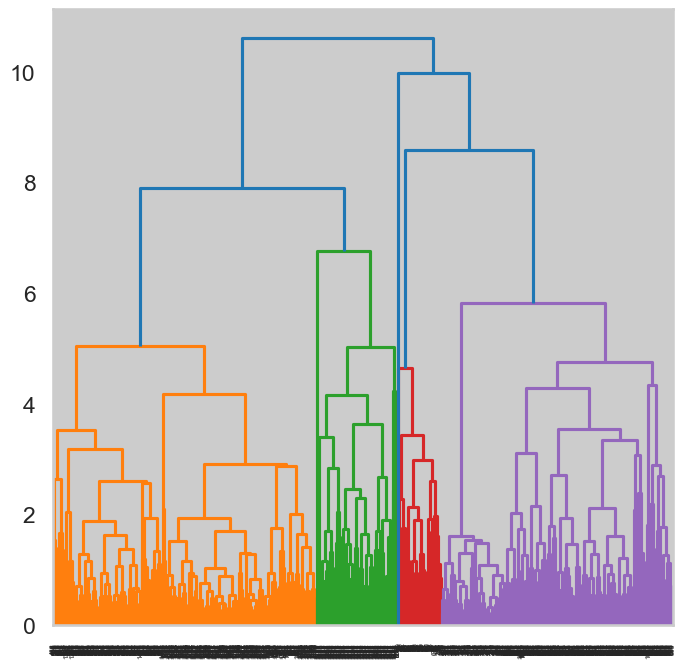

In [20]:
linkage_data = linkage(Multi_blob_Data, method='average', metric='cityblock')
dendrogram(linkage_data)
plt.show()

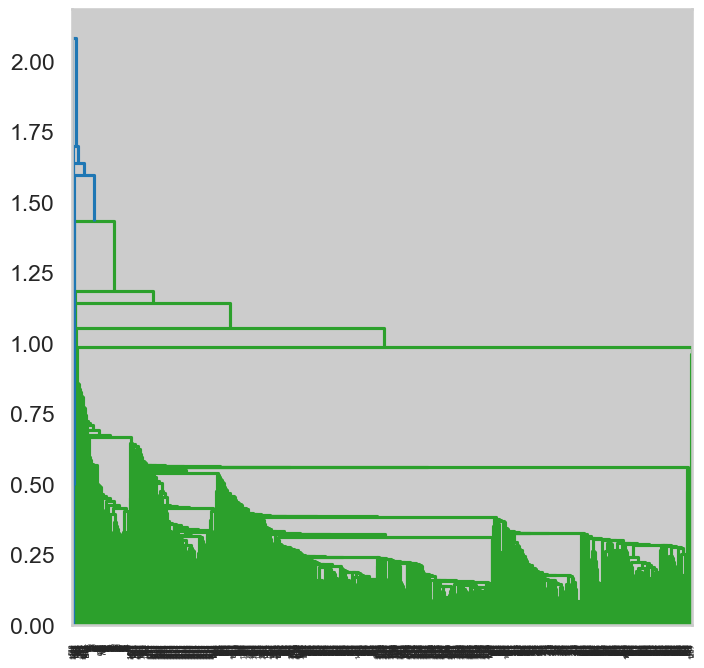

In [21]:
linkage_data = linkage(Multi_blob_Data, method='single', metric='euclidean')
dendrogram(linkage_data)
plt.show()

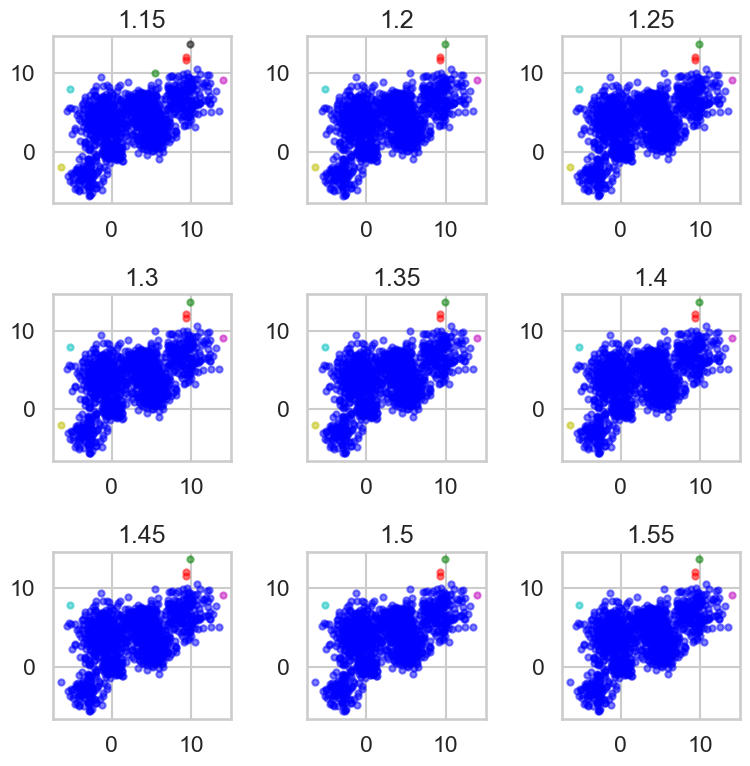

In [22]:
x=1.15
for m in range(9):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='euclidean', linkage='single')
    labels = hierarchical_cluster.fit_predict(Multi_blob_Data)
    plt.subplot(3,3,m+1)
    plt.tight_layout()
    plt.title(label=round(x, 2))
    display_cluster(Multi_blob_Data,hierarchical_cluster,hierarchical_cluster.n_clusters_)
    x=x+0.05

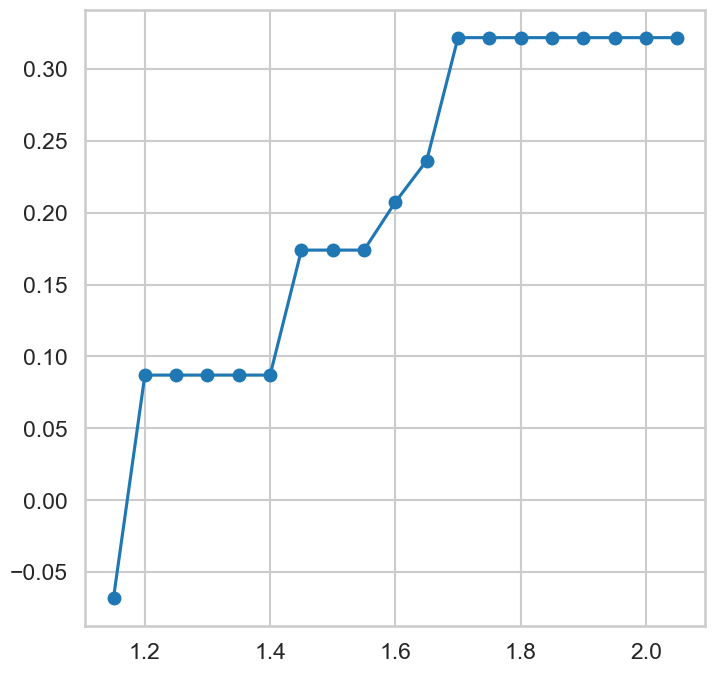

In [23]:
silhouette_scores = []
s = []
x=1.15
for i in range(19):
    s.append(x)
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='euclidean', linkage='single')
    silhouette_scores.append(silhouette_score(Multi_blob_Data, hierarchical_cluster.fit_predict(Multi_blob_Data)))
    x=x+0.05
plt.plot(s, silhouette_scores, marker='o')

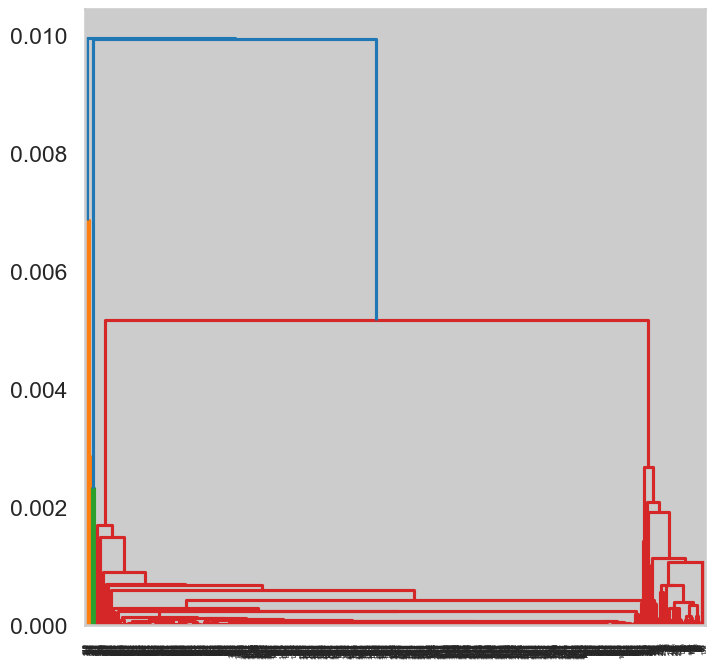

In [24]:
linkage_data = linkage(Multi_blob_Data, method='single', metric='cosine')
dendrogram(linkage_data)
plt.show()

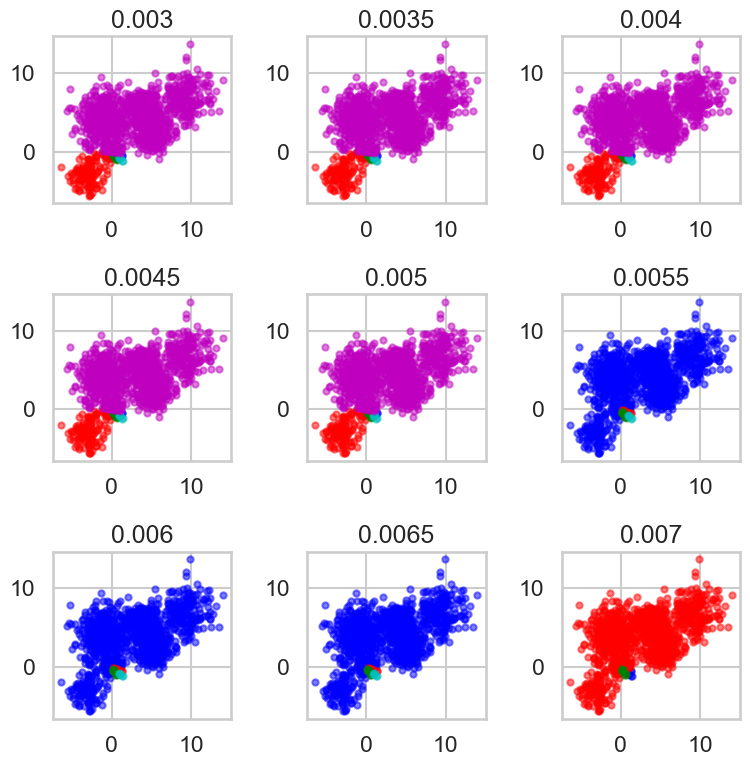

In [25]:
x=0.003
for m in range(9):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='cosine', linkage='single')
    labels = hierarchical_cluster.fit_predict(Multi_blob_Data)
    plt.subplot(3,3,m+1)
    plt.tight_layout()
    plt.title(label=round(x, 4))
    display_cluster(Multi_blob_Data,hierarchical_cluster,hierarchical_cluster.n_clusters_)
    x=x+0.0005

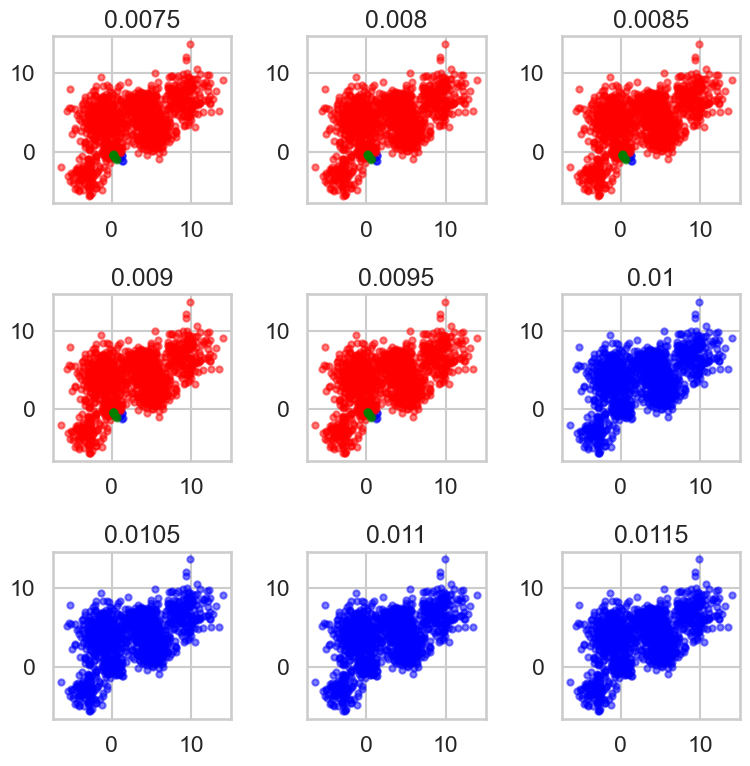

In [26]:
x=0.0075
for m in range(9):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='cosine', linkage='single')
    labels = hierarchical_cluster.fit_predict(Multi_blob_Data)
    plt.subplot(3,3,m+1)
    plt.tight_layout()
    plt.title(label=round(x, 4))
    display_cluster(Multi_blob_Data,hierarchical_cluster,hierarchical_cluster.n_clusters_)
    x=x+0.0005

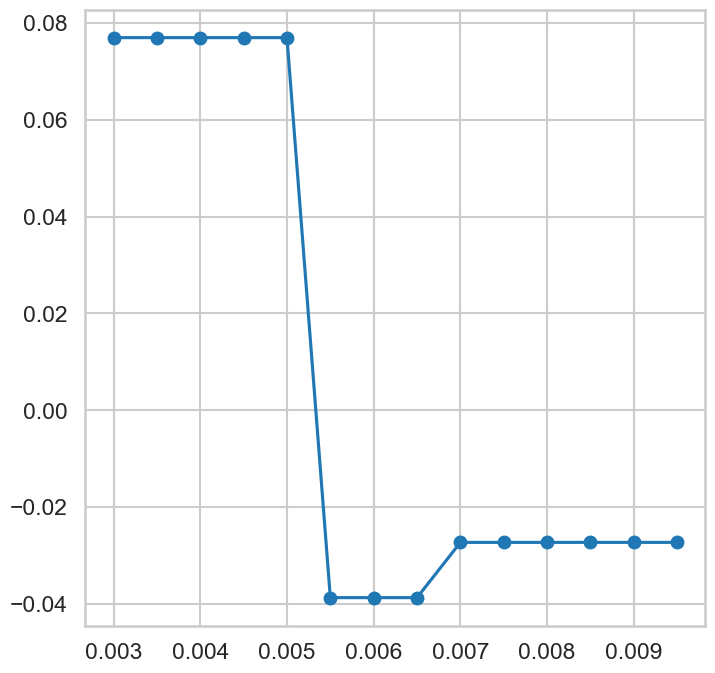

In [27]:
silhouette_scores = []
s = []
x=0.003
for i in range(14):
    s.append(x)
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='cosine', linkage='single')
    silhouette_scores.append(silhouette_score(Multi_blob_Data, hierarchical_cluster.fit_predict(Multi_blob_Data)))
    x=x+0.0005
plt.plot(s, silhouette_scores, marker='o')

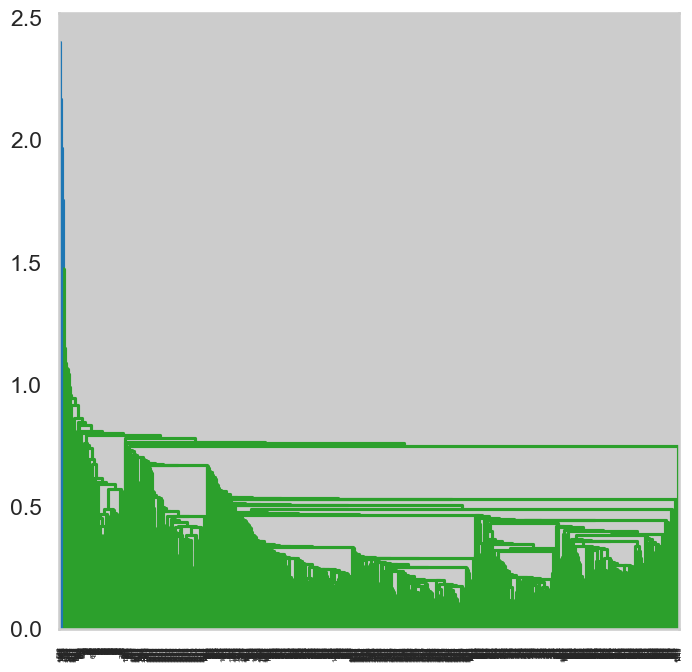

In [28]:
linkage_data = linkage(Multi_blob_Data, method='single', metric='cityblock')
dendrogram(linkage_data)
plt.show()

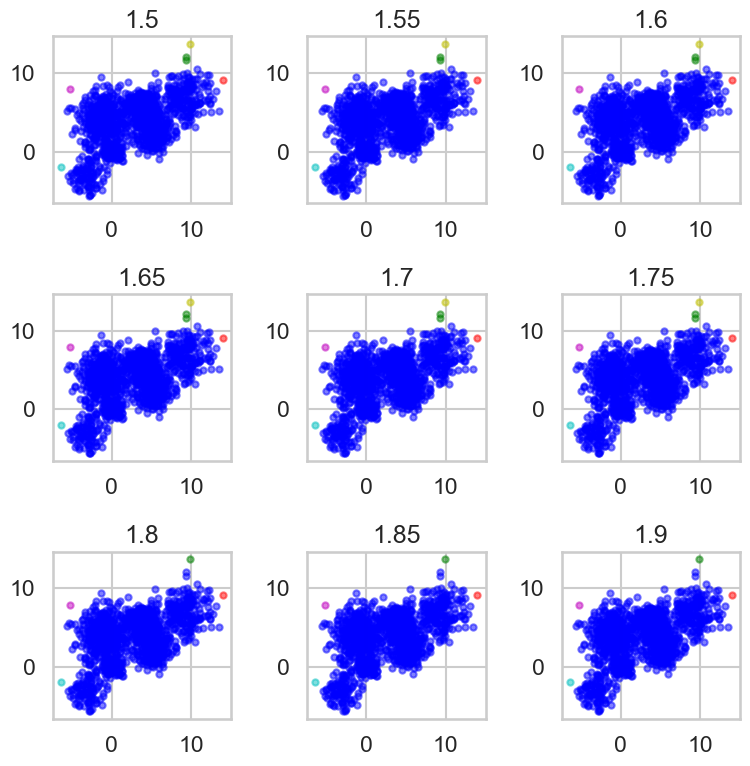

In [29]:
x=1.5
for m in range(9):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='cityblock', linkage='single')
    labels = hierarchical_cluster.fit_predict(Multi_blob_Data)
    plt.subplot(3,3,m+1)
    plt.tight_layout()
    plt.title(label=round(x, 4))
    display_cluster(Multi_blob_Data,hierarchical_cluster,hierarchical_cluster.n_clusters_)
    x=x+0.05

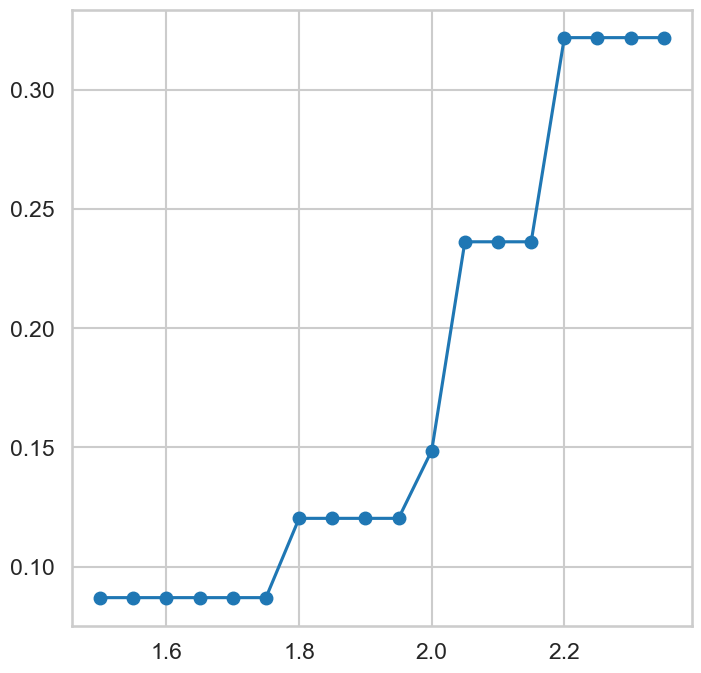

In [30]:
silhouette_scores = []
s = []
x=1.5
for i in range(18):
    s.append(x)
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='cityblock', linkage='single')
    silhouette_scores.append(silhouette_score(Multi_blob_Data, hierarchical_cluster.fit_predict(Multi_blob_Data)))
    x=x+0.05
plt.plot(s, silhouette_scores, marker='o')

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [31]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_clusterr(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    color
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(X[km.labels_==-1,0],X[km.labels_==-1,1],c = color[6],alpha = alpha,s=s)
            #plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

2.1000000000000005


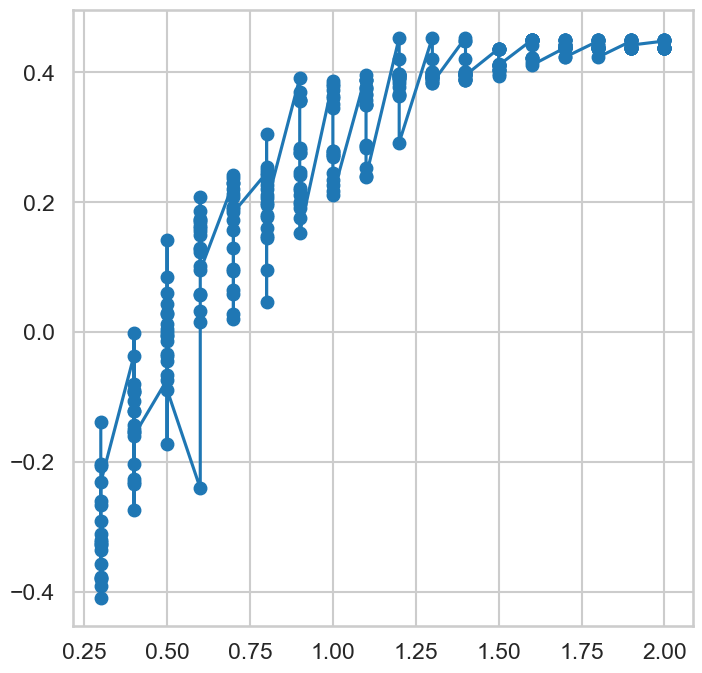

In [32]:
silhouette_scores = []
s = []
e=0.3
n=5
for m in range(18):
    n=5
    for i in range(19):
        s.append(e)
        db_default = DBSCAN(eps = e, min_samples = n).fit(Multi_blob_Data)
        silhouette_scores.append(silhouette_score(Multi_blob_Data, db_default.fit_predict(Multi_blob_Data)))
        n=n+1
    e=e+0.1
print(e)
plt.plot(s,silhouette_scores, marker='o')

1.9000000000000008


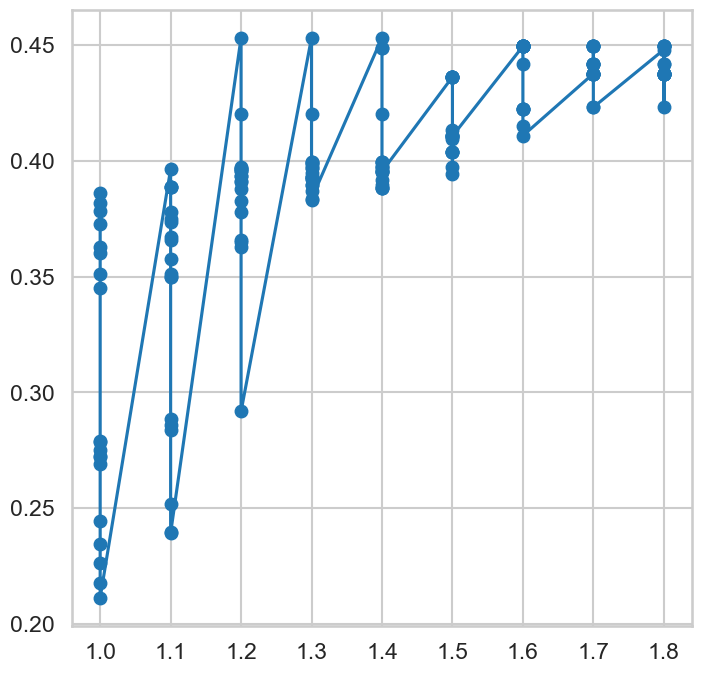

In [33]:
silhouette_scores = []
s = []
e=1
n=5
for m in range(9):
    n=5
    for i in range(19):
        s.append(e)
        db_default = DBSCAN(eps = e, min_samples = n).fit(Multi_blob_Data)
        silhouette_scores.append(silhouette_score(Multi_blob_Data, db_default.fit_predict(Multi_blob_Data)))
        n=n+1
    e=e+0.1
print(e)
plt.plot(s,silhouette_scores, marker='o')

1.2


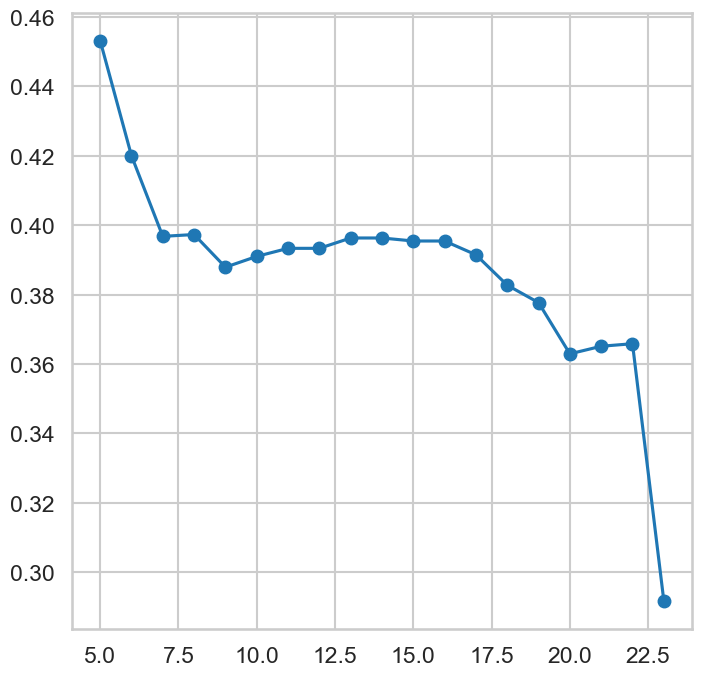

In [34]:
silhouette_scores = []
s = []
e=1.2
n=5
for i in range(19):
    s.append(n)
    db_default = DBSCAN(eps = e, min_samples = n).fit(Multi_blob_Data)
    silhouette_scores.append(silhouette_score(Multi_blob_Data, db_default.fit_predict(Multi_blob_Data)))
    n=n+1
print(e)
plt.plot(s,silhouette_scores, marker='o')

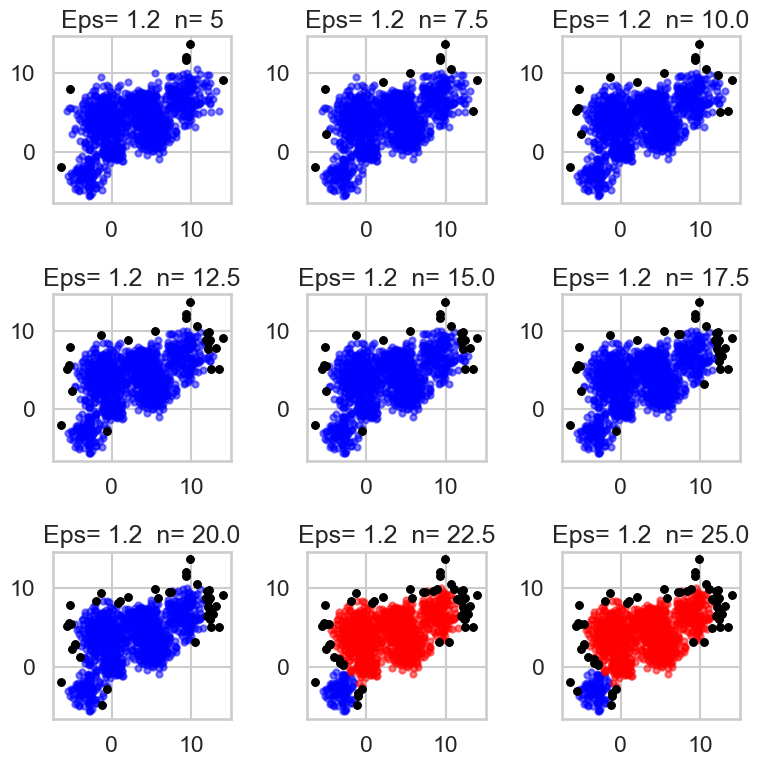

In [35]:
e=1.2
n=5
for m in range(9):
    db_default = DBSCAN(eps = e, min_samples = n).fit(Multi_blob_Data)
    labels = db_default.labels_
    plt.subplot(3,3,m+1)
    plt.tight_layout()
    plt.title(label= ("Eps= "+str(round(e, 2)) + "  n= "+str(n)))
    display_clusterr(Multi_blob_Data,db_default,7)
    n=n+2.5


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [36]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_clusterG(X,km=[],num_clusters=0,hs=[]):
    color = 'brgcmyk'  #List colors
    color
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[hs==i,0],X[hs==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(X[hs==-1,0],X[hs==-1,1],c = color[6],alpha = alpha,s=s)
            #plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

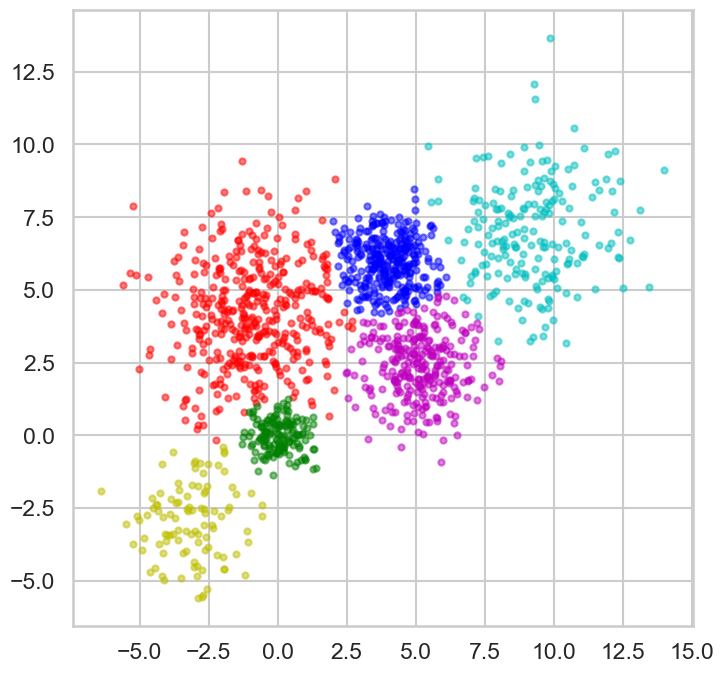

In [37]:
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

gmm = GaussianMixture(n_components=6)
gmm.fit(Multi_blob_Data)

labels = gmm.predict(Multi_blob_Data)
display_clusterG(Multi_blob_Data,gmm, num_clusters=6,hs=labels)

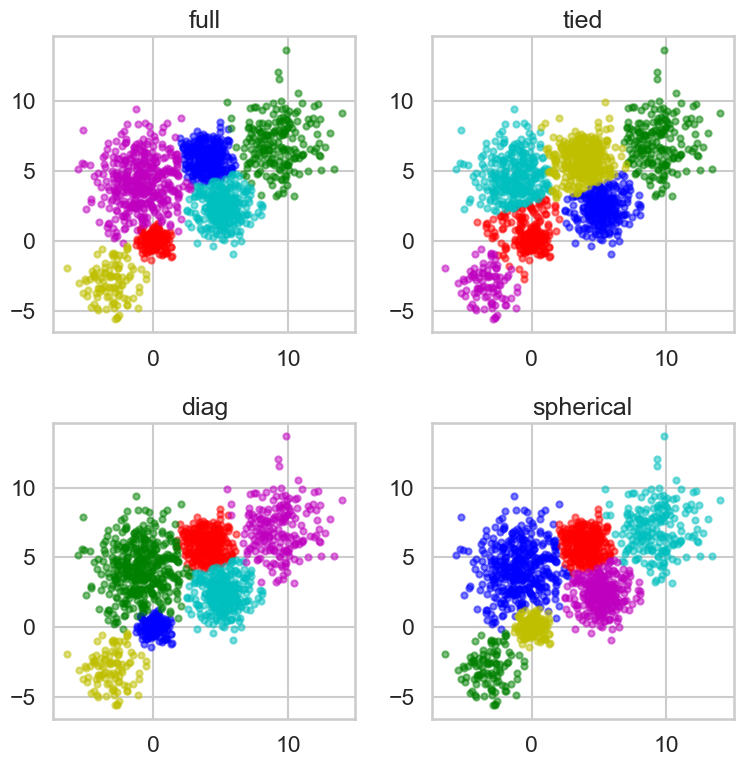

In [38]:
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
cov_types = ['full', 'tied', 'diag', 'spherical']
for m in range(4):
    gmm = GaussianMixture(n_components=6, covariance_type= cov_types[m])
    gmm.fit(Multi_blob_Data)
    labels = gmm.predict(Multi_blob_Data)
    plt.subplot(2,2,m+1)
    plt.tight_layout()
    plt.title(cov_types[m])
    display_clusterG(Multi_blob_Data,gmm, num_clusters=6,hs=labels)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [39]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
i=iris_data.data
#print(i)

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

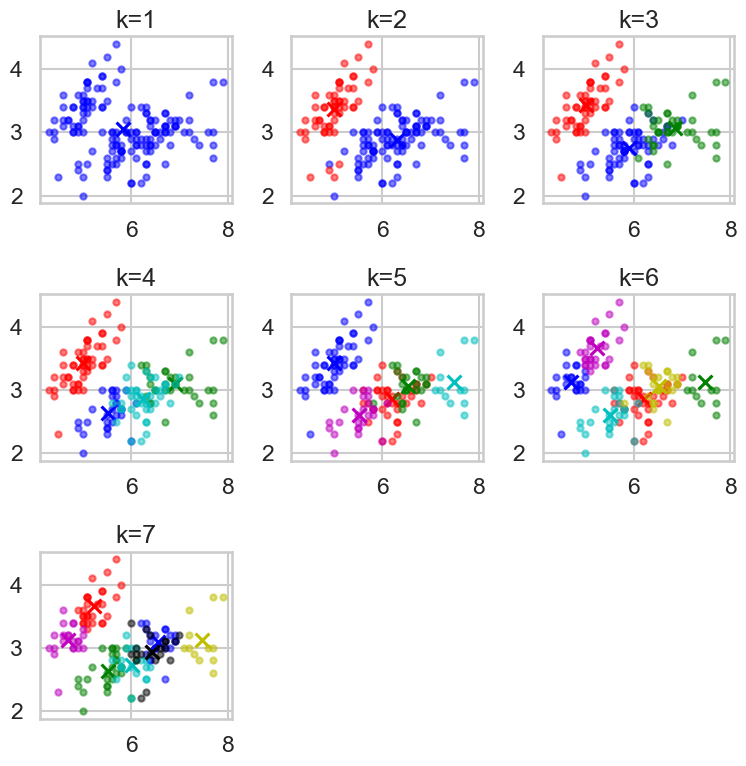

In [40]:
for x in range(1,8):
    kmeans = KMeans(n_clusters=x)
    kmeans.fit(i)
    plt.subplot(3,3,x)
    plt.tight_layout()
    plt.title('k='+str(x))
    display_clusterKM(i,kmeans,x)


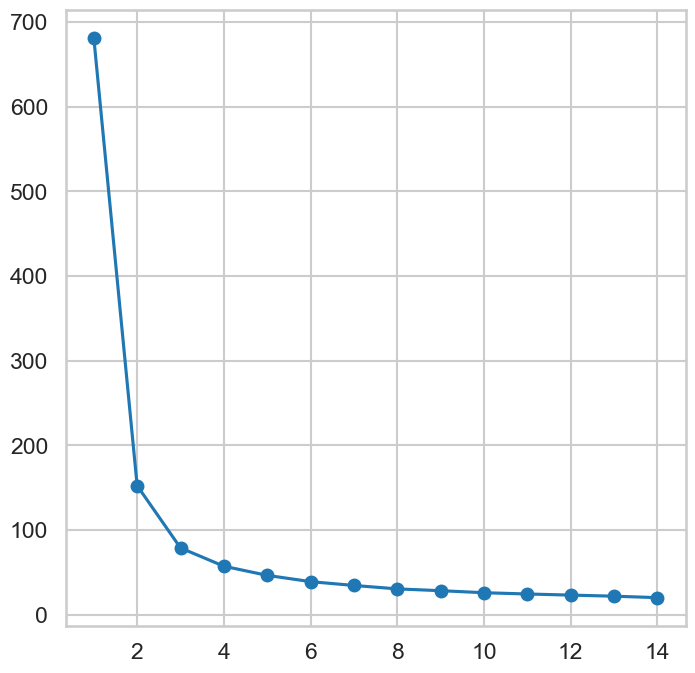

In [41]:
inertias = []
for m in range(1,15):
    kmeans = KMeans(n_clusters=m)
    kmeans.fit(i)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,15), inertias, marker='o')

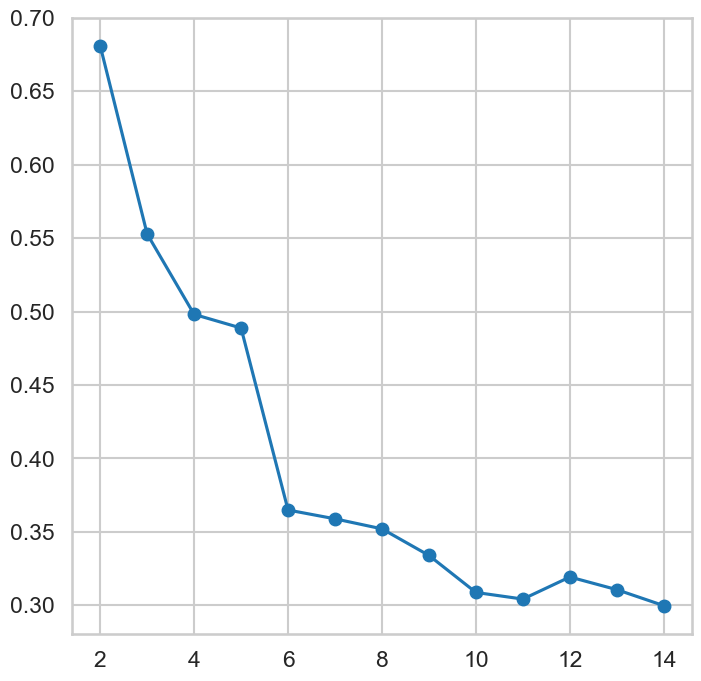

In [44]:
score = []
for m in range(2,15):
    kmeans = KMeans(n_clusters=m)
    kmeans.fit(i)
    score.append(silhouette_score(i, kmeans.labels_, metric='euclidean'))
plt.plot(range(2,15), score, marker='o')

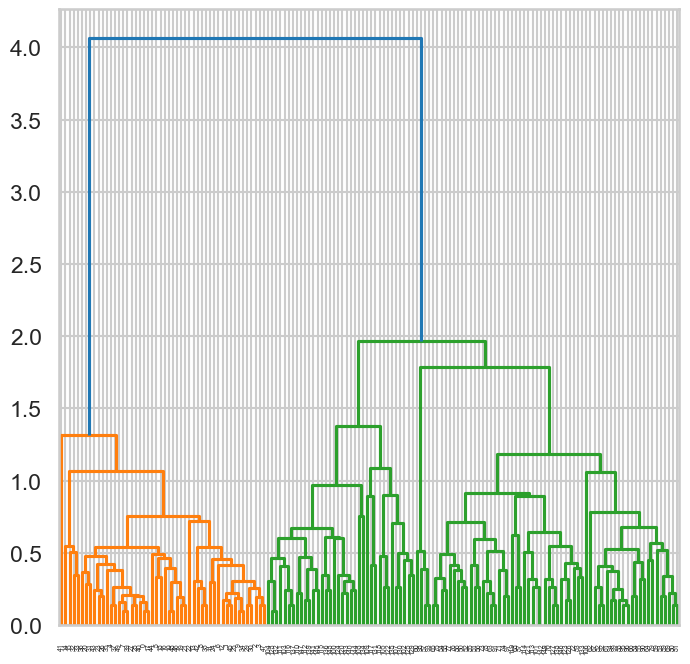

In [46]:
#hierarchical_cluster
#Multi_blob_Data
linkage_data = linkage(i, method='average', metric='euclidean')
dendrogram(linkage_data)
plt.show()

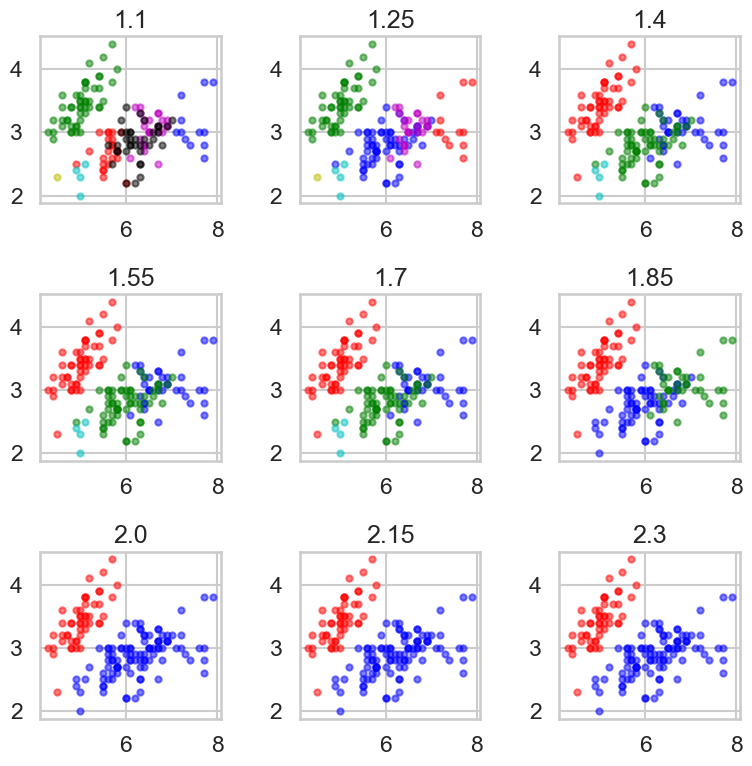

In [52]:
x=1.1
for m in range(9):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='euclidean', linkage='average')
    #4.2-
    labels = hierarchical_cluster.fit_predict(i)
    plt.subplot(3,3,m+1)
    plt.tight_layout()
    plt.title(label=round(x, 2))
    display_cluster(i,hierarchical_cluster,hierarchical_cluster.n_clusters_)
    #print(x)
    x=x+0.15
    m

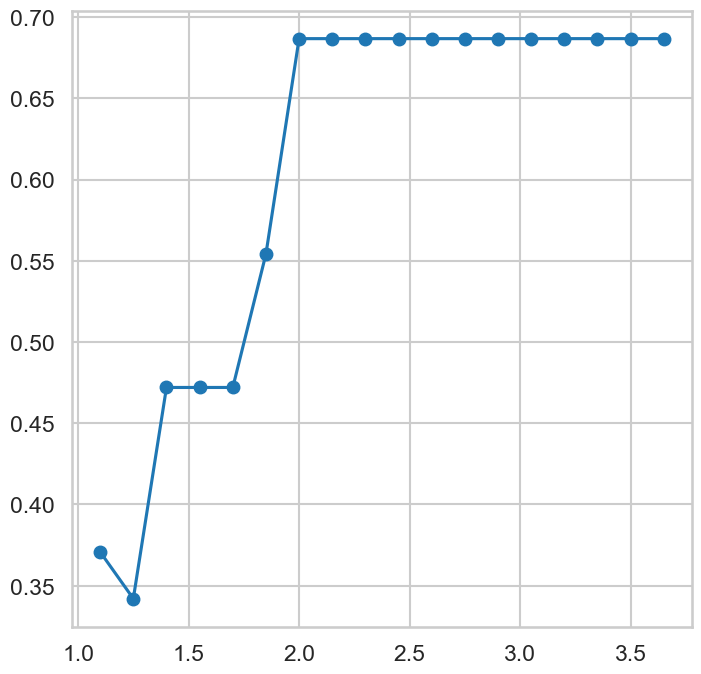

In [53]:
silhouette_scores = []
s = []
x=1.1
for m in range(18):
    s.append(x)
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=x, affinity='euclidean', linkage='average')
    silhouette_scores.append(silhouette_score(i, hierarchical_cluster.fit_predict(i)))
    x=x+0.15
plt.plot(s, silhouette_scores, marker='o')

## Customer dataset
Repeat all the above on the customer data set 